In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
! pip install mplfinance

In [146]:
df = pd.read_csv('./BTC-Daily.csv')

# Remove duplicate rows
df = df.drop_duplicates()

In [147]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [148]:
df['symbol'].value_counts()

symbol
BTC/USD    2651
Name: count, dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


In [150]:
df['date'] = pd.to_datetime(df['date'])


In [151]:
data_range = f"{min(df['date'])} to {max(df['date'])}"
print(data_range)

2014-11-28 00:00:00 to 2022-03-01 00:00:00


In [152]:
df['year'] = df['date'].dt.year

df['year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

In [153]:
df_2021 = df.loc[(df['date'] > '2021-01-01') & (df['date'] < '2022-01-01')]

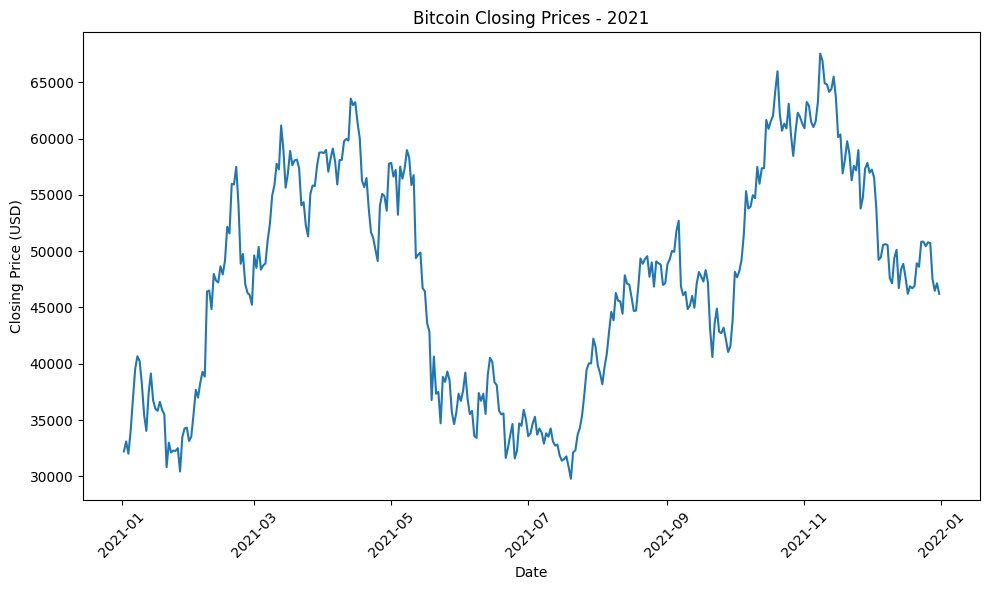

In [154]:

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_2021, x='date', y='close')
plt.title(f'Bitcoin Closing Prices - {2021}')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [155]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime
import mplfinance as mpf

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26544\1133183555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


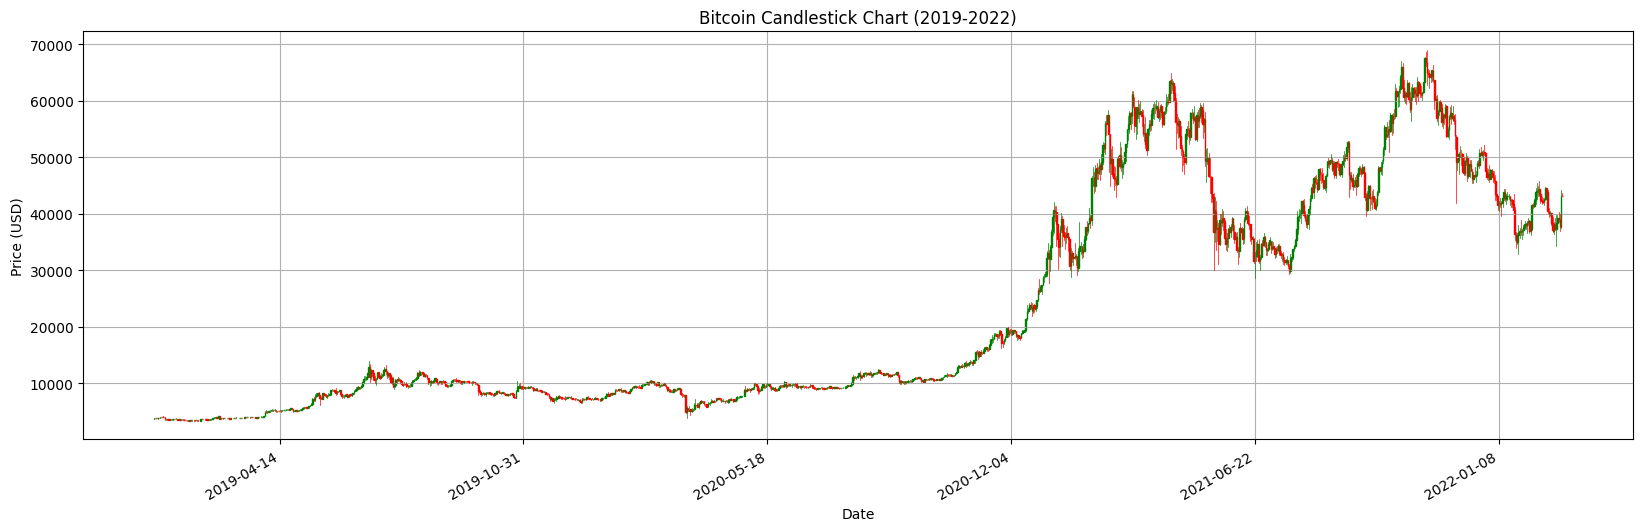

In [156]:
# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

# Vẽ biểu đồ nến dựa trên các cột ngày, giá mở cửa, cao nhất, thấp nhất, và đóng cửa
candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values,
                 width=0.6, colorup='g', colordown='r')

#  Định dạng trục x để hiển thị ngày tháng theo định dạng YYYY-MM-DD.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# fig.autofmt_xdate()
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()

### 4 Tạo mô hình Linear Regression:

In [157]:
def predict(X, w, b):
  return X.dot(w) + b

def gradient(y_hat, y, x):
    loss = y_hat - y
    dw = x.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss**2) / (2 * len(y))
    return (dw, db, cost)

def update_weight(w, b, lr, dw, db):
    w_new = w - lr * dw
    b_new = b - lr * db
    return (w_new, b_new)

def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
  n_samples, n_features = X.shape
  w = np.zeros(n_features)  # Initialize weights
  b = 0  # Initialize bias
  losses = []

  for _ in range(num_iterations):
    y_hat = predict(X, w, b)  # Make predictions
    dw, db, cost = gradient(y_hat, y, X)  # Calculate gradients
    # Update weights and bias
    w, b = update_weight(w, b, learning_rate, dw, db)
    losses.append(cost)

  return w, b, losses

### Chuẩn hóa dữ liệu và chia tập train và test

### Lưu ý khi chuẩn hóa : Chuẩn hóa cả x lẫn y , tại Linear nhạy cảm với distance với là mục tiêu chỉ là tìm w,b nên cần chuẩn hóa

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Chọn các cột cần chuẩn hóa
X = df[['open', 'high', 'low']]
y = df[['close']]

# Tạo scaler cho X và y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Chuẩn hóa X và y trước khi chia tập dữ liệu
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Chia tập dữ liệu thành training và testing sau khi chuẩn hóa
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=42, shuffle=True)



### Huấn luyện mô hình Linear Regression:

[0.33133892 0.33282029 0.33286545] -3.1539045852562704e-05 [0.5076590351265674, 0.47721350457892653, 0.4485958427000727, 0.4216963091039157, 0.39641175192603956, 0.3726452122663381, 0.3503055523798661, 0.3293071061901245, 0.3095693507846021, 0.2910165976328527, 0.27357770234302, 0.25718579184381085, 0.24177800794573903, 0.22729526629827193, 0.21368202981855033, 0.2008860957228475, 0.1888583953440935, 0.17755280596782558, 0.16692597396500786, 0.15693714854348811, 0.14754802548057555, 0.1387226002375004, 0.13042702989249183, 0.12262950336302714, 0.11530011941959321, 0.10841077202317821, 0.10193504254679574, 0.09584809846774314, 0.09012659814210773, 0.08474860129635903, 0.07969348489278845, 0.07494186404616479, 0.07047551768834383, 0.0662773186957778, 0.06233116821198352, 0.05862193391311577, 0.0551353919799114, 0.05185817255348426, 0.04877770846580948, 0.045882187048293464, 0.04316050483362944, 0.04060222497723353, 0.038197537234984744, 0.035937220343795505, 0.03381260666075262, 0.031815

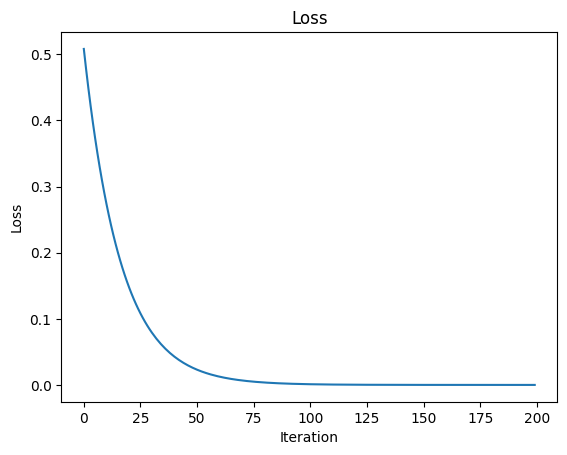

In [159]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    b = 0  # Initialize bias
    losses = []

    for _ in range(num_iterations):
        y_hat = predict(X, w, b)
        dw, db, cost = gradient(y_hat, y, X)
        w, b = update_weight(w, b, learning_rate, dw, db)
        losses.append(cost)

    return w, b, losses



w, b, losses = linear_regression_vectorized(X_train, y_train.flatten(),

                                            learning_rate=0.01, num_iterations=200)

print(w, b, losses)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [173]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): nan
Mean Absolute Error (MAE): 0.9159
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26544\1384314896.py:7: RuntimeWarning: invalid value encountered in sqrt
  rmse = np.sqrt(np.mean((y_pred - y_test)))
